<a href="https://colab.research.google.com/github/solobala/IvanGame/blob/master/pr_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика 3
Выполнена студентом группы ИКБО-27-22 Соловьевом И.Е.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Импорты

In [14]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts
from scipy.stats import normaltest

In [102]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from numpy.random import seed

## Задание 1
**Загрузить данные из файла “insurance.csv”.**

In [3]:
# data = pd.read_csv("insurance.csv")
data = pd.read_csv("/content/drive/MyDrive/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Данные содержат 7 признаков, из которых 3 признака - sex, smoker, region - категориальные, а 4 - age, bmi, children и charges - численные.  Пропусков нет.

In [13]:
# Отбор численных признаков
names = data.select_dtypes(exclude='object').columns.to_list()
names

['age', 'bmi', 'children', 'charges']

## Задание 2
**С помощью метода describe() посмотреть статистику по данным. Сделать выводы**

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Вывод
- Средний возраст клиентов — около 39 лет, диапазон от 18 до 64.
- Средний BMI ~30.6, что соответствует избыточному весу.
- В среднем у клиентов около 1 ребёнка, максимум — 5.
- Распределение расходов (charges) сильно варьируется: медиана ~9382, но максимум превышает 63 тыс., что говорит о наличии выбросов и высокой дисперсии.

## Задание 3
**Построить гистограммы для числовых показателей. Сделать выводы.**

In [ ]:
# для каждого из числовых  признаков определяем количество уникальных значений.
# это понадобится для задания параметра binwidth при построении гистограмм
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in names],
                                          columns=['Наименование признака', 'Кол-во уникальных значений']).sort_values(by=['Кол-во уникальных значений'])
unique_counts

,Наименование признака,Кол-во уникальных значений
2,children,6
0,age,47
1,bmi,548
3,charges,1337


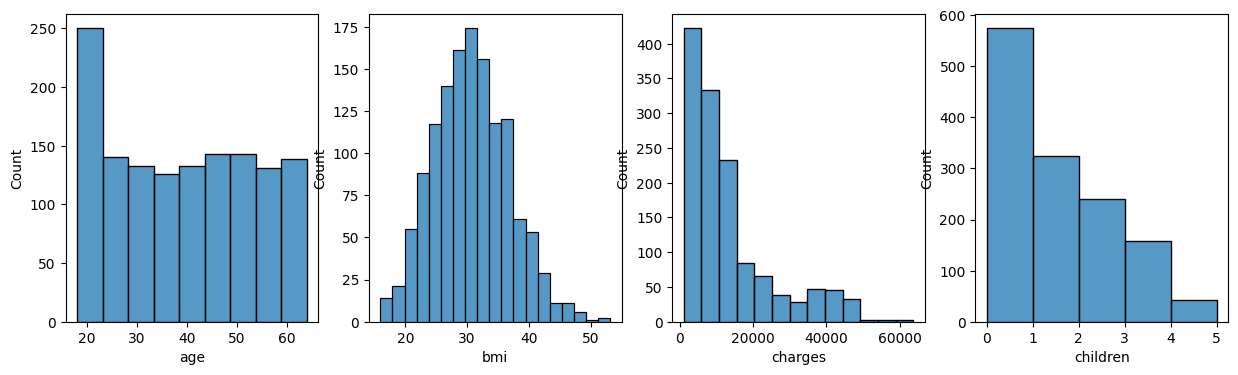

In [ ]:
# Визуализация распределения числовых признаков с помощью гистограмм
plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(data=data, x="children", binwidth=1)
plt.subplot(1, 4, 1)
sns.histplot(data=data, x="age", binwidth=5)
plt.subplot(1, 4, 2)
sns.histplot(data=data, x="bmi", binwidth=2)
plt.subplot(1, 4, 3)
sns.histplot(data=data, x="charges", binwidth=5000)
plt.subplot(1, 4, 4)
plt.show()

Вывод: Признак 'children' ( кол-во детей) - преобладают семьи без детей ( почти половина). Многодетных семей ( 4 и более ребенка) очень мало, менее процента.

Признак 'age' ( возраст) - люди до 20 лет ( молодежь)- почти 20%. Остальные возрастные группы  содержат примерно равное количество.

Признак 'bmi' - Распределение признака bmi близко к нормальному, у остальных признаков - нет.Более трети имеют невысокие доходы - до 10 тыс. незначительное число ( менее процента)  имеют высокие доходы.

Более интересен анализ данных в разрезе нескольких признаков.

Можно посмотреть, например,


*   индекс массы тела в зависимости от пола
*   индекс массы тела по возрастным группам
*   расходы в зависимости от пола
*   расходы по возрастным группам



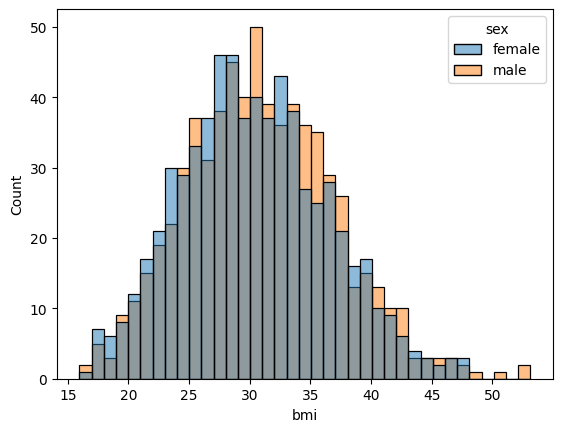

In [ ]:
# Индекс массы тела в зависимости от пола
sns.histplot(data=data, x="bmi", binwidth=1, hue="sex")
plt.show()

Вывод: bmi до 30 (т.е. вес норм альный или ниже нормы - преобладает у женщин) 30 и более - преоблажают мужчины. Супертолстяки ( bmi более 48) - только мужчины

In [ ]:
data['age_group'] = data['age'].apply(lambda x:'young' if x<=30 else 'middle' if (x>30) & (x<48) else 'senior')

In [ ]:
data['age_group'].value_counts()

,count
age_group,
middle,452
young,444
senior,442


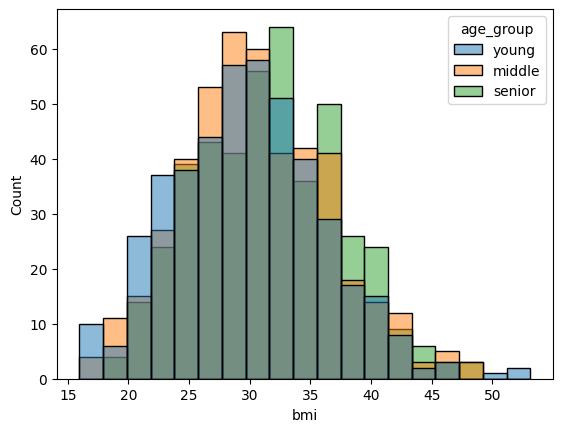

In [ ]:
# Индекс массы тела по возрастным группам
sns.histplot(data=data, x="bmi", binwidth=2, hue="age_group")
plt.show()

Вывод: bmi до 24 - наиболее часто встречается у молодежи.В то же время, супертолстуны ( bmi> 50) - также у молодежи но их мало, видимо, это болезнь. bmi 25-33 характерен для персон среднего возраста, а у пожилых - от 33 и более

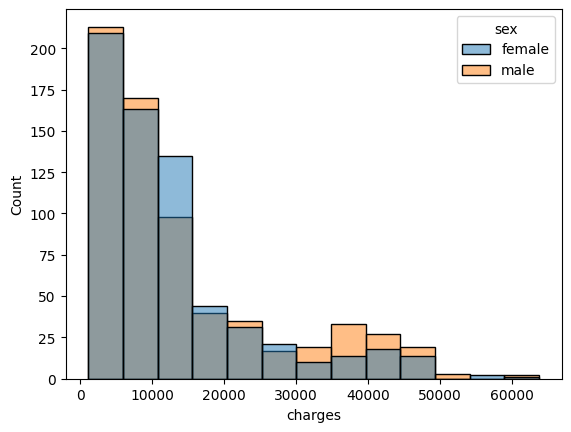

In [ ]:
# Расходы в зависимости от пола
sns.histplot(data=data, x="charges",  binwidth=5000, hue="sex")
plt.show()

Вывод: расходы в диапазоне от 10 до 20 тыс. - преобладает у женщин;
высокие расходы ( от 30 тыс ) - преобладает у мужчин

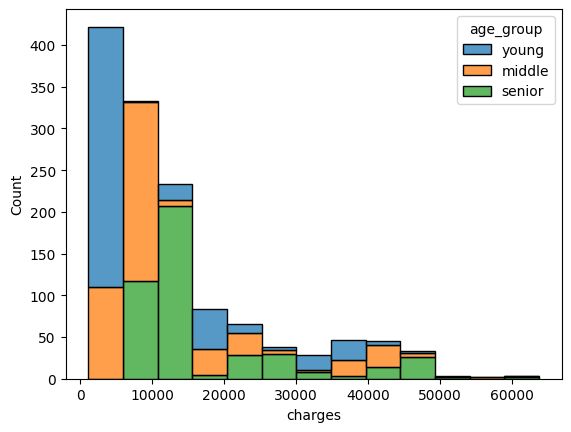

In [ ]:
# Расходы в зависимости от возрастной группы
sns.histplot(data=data, x="charges", multiple="stack", binwidth=5000, hue="age_group")
plt.show()

Вывод:Самые низкие расходы  - до 5 тыс . у молодежи.



## Задание 4
**Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы.**


**Меры центральной тенденции**:

*Среднее арифметическое* (часто называется просто «средним») — наиболее распространённая мера центральной тенденции.

*Медиана* — значение, которое делит упорядоченный набор данных на две равные части.

*Мода* — значение, которое чаще всего встречается в наборе данных.

Меры **разброса**

*Размах* — разница между наибольшим и наименьшим значениями в наборе данных. Помогает оценить, насколько значения переменной разбросаны вокруг среднего значения или сконцентрированы в узком диапазоне.

*Дисперсия* — средний квадрат отклонений от среднего значения. Учитывает все значения в наборе данных, предоставляет обширную информацию о разбросе.

*Стандартное отклонение* — квадратный корень из дисперсии, выражает разброс в тех же единицах измерения, что и исходная величина.

*Интерквартильный размах (IQR)* — разница между третьим и первым квартилями в упорядоченном наборе данных. Охватывает центральные 50% данных и служит показателем разброса в этой области. Устойчив к выбросам, так как не зависит от крайних значений.

Меры центральной тенденции можно получить с использованием метода describe().
Но в результатах describe() нет расчетов большинства мер разброса - размаха, дисперсии, межквартильного размаха, поэтому написана ф-я get_stat(names). можно ьакже использовать scipy.stats

In [ ]:
def get_stat(names):
  """
  Функция для расчета и печати основных статистик.
  на входе - список названий столбцов
  на выходе- к-во признаков серии за вычетом NAN и 10 основных статистик -
  max, min, range, mean, mode, std, var, Q1, Q3, iqr
  """
  for name in names:
    count_ = data[name].count()
    max_ = data[name].max()
    min_ = data[name].min()
    range_ = round(data[name].max() - data[name].min(),1)
    mean_ = data[name].mean()
    mediana_ = data[name].quantile(0.50)
    mode_ = data[name].mode()[0]
    std_ = data[name].std()
    var_ = data[name].var()
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    iqr = Q3-Q1
    print(f'{name}:')
    print(f'count = {count_}, max = {max_}, min = {min_}, range = {range_}, mean = {mean_}, mediana = {mediana_},  mode = {mode_}, std = {std_}, var = {var_}, Q1 = {Q1},  Q3 = {Q3}, IQR = {iqr}')
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------')



In [ ]:
# Основные статистики для bmi
get_stat(names[1:2])

bmi:
count = 1338, max = 53.13, min = 15.96, range = 37.2, mean = 30.66339686098655, mediana = 30.4,  mode = 32.3, std = 6.098186911679017, var = 37.187883609773266, Q1 = 26.29625,  Q3 = 34.69375, IQR = 8.3975
-------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# основные статистики для charges
get_stat(names[3:])

charges:
count = 1338, max = 63770.42801, min = 1121.8739, range = 62648.6, mean = 13270.422265141257, mediana = 9382.033,  mode = 1639.5631, std = 12110.011236693994, var = 146652372.1528548, Q1 = 4740.28715,  Q3 = 16639.912515, IQR = 11899.625365
-------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [76]:
def draw_hist(x, title, x_name, xlbl, xtext):
  """
  Функция для построения гистограммы с использованием seaborn
  и нанесения медианы, моды и среднего арифметического признака
  x: series данные для визуализации
  x_name: char имя признака
  xlbl:char подпись для оси х
  xtext:char вывод
  """
  plt.figure(figsize=(10, 6))
  # Устанавливаем стиль
  sns.set_style("whitegrid")
  # Строим гистограмму с дополнительными элементами
  ax = sns.histplot(
  x,
  bins=20,
  kde=True,
  line_kws={'linewidth': 2}
  )
  # Добавляем вертикальную линию для среднего
  plt.axvline(np.mean(x), color='red',
            linestyle='--', linewidth=2,
            label=f'Среднее: {np.mean(x):.2f}')
  # Добавляем вертикальную линию для среднего
  plt.axvline(np.median(x), color='orange',
            linestyle='-', linewidth=2,
            label=f'Медиана: {np.median(x):.2f}')
  plt.axvline(x.mode()[0], color='black',
            linestyle='-.', linewidth=2,
            label=f'Мода: {x.mode()[0]:.2f}')
  plt.title(f" {title} {x_name}",
  fontsize=14)
  plt.xlabel(f"{xlbl} {x_name}", fontsize=12)
  plt.ylabel("Количество", fontsize=12)
  plt.legend()
  # Добавляем аннотацию с ключевым выводом
  ax.text(0.05, 0.9, f"{xtext}",
  transform=ax.transAxes, fontsize=10,
  bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))
  plt.tight_layout()
  plt.show()

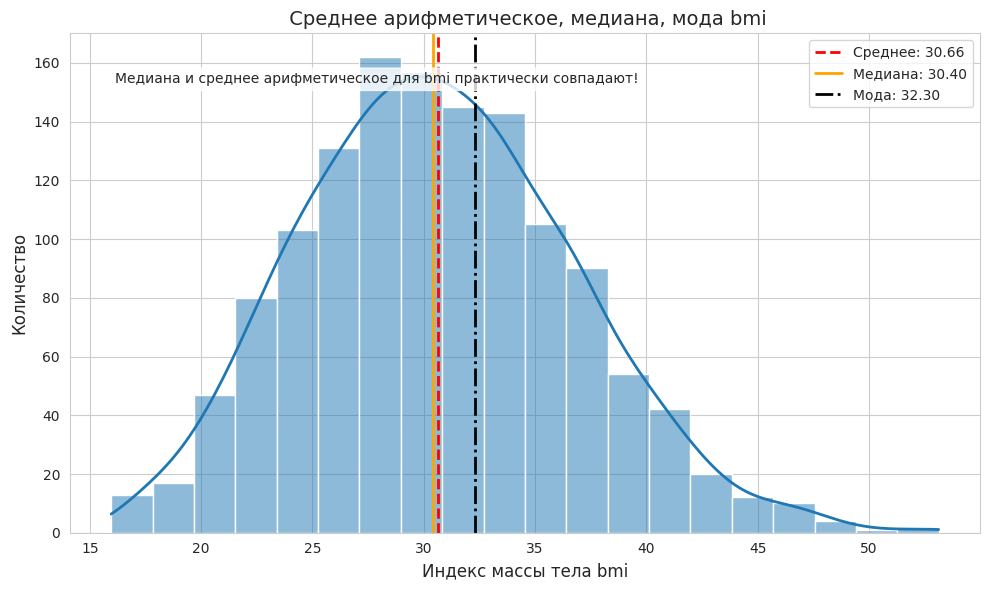

In [77]:
draw_hist(data['bmi'], 'Среднее арифметическое, медиана, мода', 'bmi', 'Индекс массы тела', "Медиана и среднее арифметическое для bmi практически совпадают!")

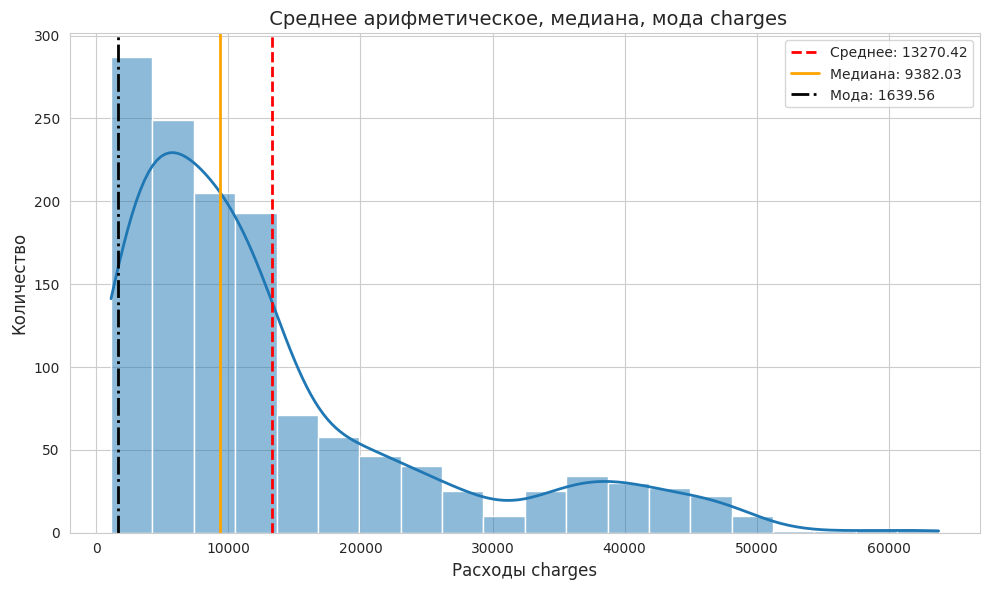

In [78]:
draw_hist(data['charges'],'Среднее арифметическое, медиана, мода', 'charges', 'Расходы', "")

## Вывод
для bmi гистограмма  визуально имеет нормальное рапределение (гипотеза требует проверки с помощью ститистических тестов!), значения среднего арифметического и медианы практически совпадают, значение моды отличается. Все три линии находятся близко к центру гистограммы.

Для charges гистограмма смещена влево. Соответсвенно, все три линии -медиана, среднее, мода не совпадают и также смещены в начало гистограммы. Вих
зуально риаспределение не является нормальным

## Задание 5
**Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы.**

Графики-боксы предоставляют визуальный способ обнаружения выбросов. На графике-боксе выбросы отображаются как точки за пределами "усов", которые представляют собой диапазон данных, не включающий выбросы


In [219]:
def get_boxplot(X, xlbl=[],  columns=[]):
  """ Функция для визуализации признаков в виде box-plot
  X: DataFrame - датафрейм признаков
  xlbl:list - список подписей для оси х
  columns: list -список имен признаков"""

  for i in range(len(columns)):
        sns.boxplot(x=X[columns[i]])
        plt.title(f"Box-plot для признака {xlbl[i]} ({columns[i]})",
        fontsize=10)
        plt.xlabel(f"{xlbl[i]} ({columns[i]})", fontsize=8)
        plt.ylabel("Количество", fontsize=8)
        plt.show()


In [ ]:
xlbl=['Возраст', 'Индекс массы тела', 'Кол-во детей', 'Расходы'] # список подписей оси х

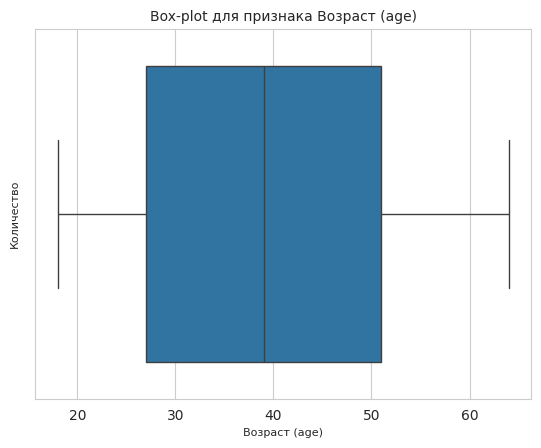

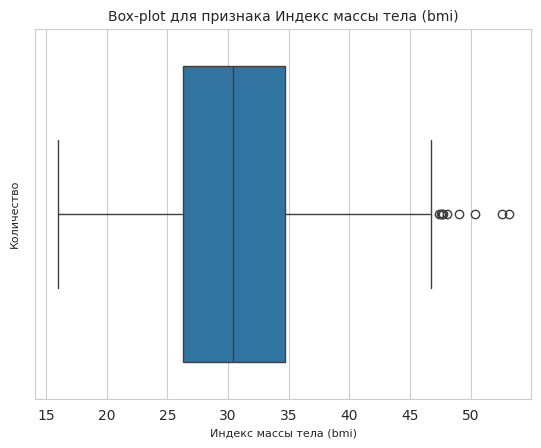

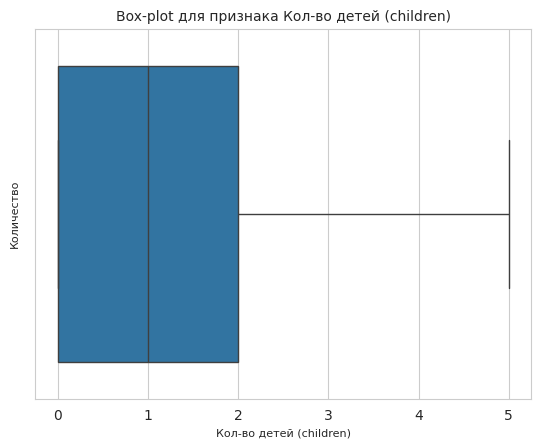

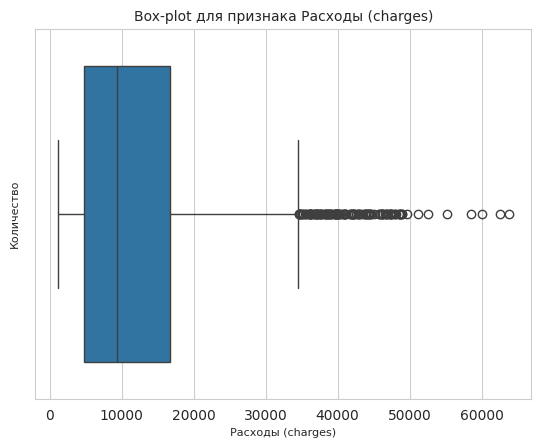

In [ ]:
get_boxplot(data, xlbl, columns=names)

## Вывод
отсутствуют выбросы у признаков age и children. Значительное количество у charges и bmi

## Задание 6
**Используя признак charges или bmi, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.**

Центральная предельная теорема утверждает, что при достаточно большом размере выборки распределение среднего значения выборки будет приближаться к нормальному распределению, независимо от формы исходного распределения данных.
Размер выборки обычно должен быть больше или равен 30. В некоторых случаях даже при объёме выборки менее 30 теорема всё равно работает, но для этого распределение совокупности должно быть близким к нормальному или симметричному.
ЦПТ позволяет использовать нормальное распределение для различных статистических методов даже тогда, когда исходные данные не нормальны.

При большом размере выборки среднее значение выборки становится точной оценкой среднего значения генеральной совокупности.

ЦПТ позволяет строить доверительные интервалы для среднего значения генеральной совокупности на основе выборочного среднего и стандартной ошибки.

Методы проверки

1. Генерация случайных выборок из заданного распределения вероятностей. Для каждой выборки вычисляют выборочное среднее, и сравнивают распределение выборочных средних с нормальным распределением.

  Один из способов проверки - поверх гистограммы частот выборочных средних построить теоретическую кривую нормального распределения.

  Еще один способ – это график Q-Qplot (Quantile- plot). Представляет собой зависимость исходных значений выборки и значений идеального нормального распределения. Если наблюдается идеальная прямая, то данные следуют нормальному закону, если наблюдается отклонение выше прямой, то исходные значения выше, чем нормальные, и наоборот. Удобно использовать Q-Q plot, когда данных немного. Также Q-Q позволяет определить асимметрию в данных.

  Можно выполнить статистические тесты. В нашем случае - это тест Колмогорова-Смирнова (т.к в серии средних случайных выборок 300 элементов, а тест работает при n>50)

2. Оценка параметров распределения выборочных средних — среднего значения и стандартного отклонения. Расхождение между вычисленными и ожидаемыми значениями, полученными в соответствии с ЦПТ, — результат случайности (ошибка выборки).



In [176]:
sample_size_min = 50  # минимальный размер выборки для демонстрации ЦПТ
num_samples = 300  # количество выборок
feature = data['charges'] # Признак, для которого проверяем ЦПТ
feature_mean = np.mean(feature) # Среднее значение признака
sample_sizes = np.random.randint(sample_size_min, len(feature), num_samples) # генерация размеров случайной выборки
sample_means = pd.Series(v for v in [np.mean(np.random.choice(feature, sample_size)) for sample_size in sample_sizes])# вычисление средних значений случайных выборок. преобразуем в серию, чтобы спользовать уже написанную функцию draw_hist

In [177]:
sample_sizes

array([1111,  285, 1146,  955,  765,  897, 1010,  194,  179,  799,  558,
       1252, 1328,  407,  964,  518,  957,  302,  718,  448,  612,  630,
       1289, 1051,  803, 1160,  191, 1081,  369,  879,  563,  366,  259,
        778,  677,  481,  683,  506,  592, 1145,  565, 1014,  842,  547,
       1117, 1100,  671,  933,   65, 1138,  246,   75, 1096, 1049, 1200,
        205,  983,  363,  645, 1240,  698,  801, 1161,  293,  636, 1264,
        978, 1225,  745,  946, 1327,  511,  614,  519,  199,  765,  313,
        127,  762, 1149, 1117,  582,  921, 1014,  619,  260,  146,  319,
       1084,  329,  899,  939,  202,  466, 1214, 1267,  656,  539,  202,
        933,  915,  180,  665,  316,  539,  520, 1272,  756,  377,  226,
       1089,  951,  220,   70,  680,  328,  535,  676,  659, 1084, 1170,
        233,  367,  455, 1305, 1170,  555, 1099,  960,  191, 1286,  861,
        746,  961, 1069, 1211,  500,  249,  470,  919,  810,   71,  127,
        269,  739,  419,  706, 1308,  501,  934, 10

In [178]:
sample_means

,0
0,13319.358496
1,12938.133636
2,13800.633781
3,13420.813132
4,13247.724193
...,...
295,12188.620936
296,12624.436799
297,13993.531818
298,13601.675926


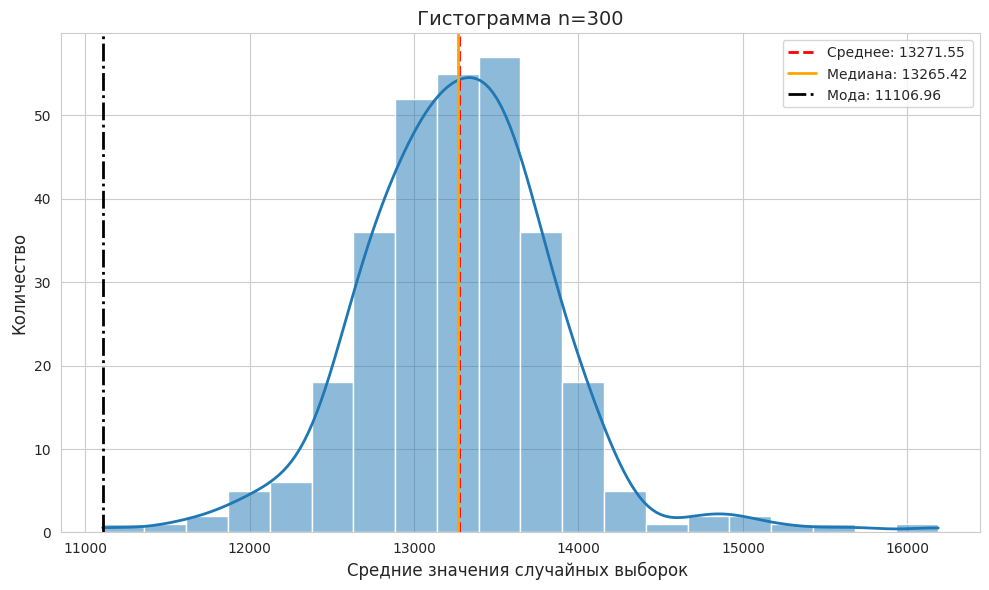

In [179]:
draw_hist(sample_means, f'Гистограмма n={num_samples}', '','Средние значения случайных выборок',   '')

В нормальном распределении меры центральной тенденции практически сопадают. Однако нормальность требует дополнительных проверок.

Судя по графику, это не нормальное распределение

Находим среднее, стандапртное отклонение, дисперсию для исходной совокупности и выборочных средних

In [154]:
def get_stats(names,datas):
  """
  Функция для расчета и печати основных статистик.
  на входе - списки названий выборок и выборок
  на выходе- размер,среднее значение, дисперсия каждой из выборок, а также
  предположение о равенстве дисперсий
  """
  count_, mean_, var_, std_ =[],[],[], []
  for data in datas:
    count_.append(len(data))
    mean_.append(np.mean(data))
    var_ .append(np.var(data))
    std_.append(np.std(data))
    print(f'{names[datas.index(data)]}:')
    print(f'count = {count_[datas.index(data)]}, mean = {mean_[datas.index(data)]},  var = {var_[datas.index(data)]}, std = {std_[datas.index(data)]}')
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------')
  return count_,mean_,var_, std_

In [155]:
count_,mean_, var_, std_ = get_stats(['charges', 'sample_means_charges'], [A,B])

charges:
count = 1338, mean = 13270.422265141257,  var = 146542766.49354792, std = 12105.484975561612
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
sample_means_charges:
count = 300, mean = 13283.990282303173,  var = 292371.0241441254, std = 540.7134399514455
-------------------------------------------------------------------------------------------------------------------------------------------------------------------


Вывод: Полученные значения среднего близки по абсолютному значению для обеих выборок, а стандартные отклоненния и дисперсии в абсолютном выражении различны.

## Вывод

## Задание 7
Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

In [192]:
feature_names = ['charges', 'bmi']
alfas =[0.95, 0.99] # доверительные интервалы
locs = [np.mean(data['charges']), np.mean(data['bmi'])] # средние значения признаков
sigmas = [np.std(data['charges']), np.std(data['bmi'])] # стандартные отклоненитя признаков
ci_lowers, ci_uppers, Ls = [], [], []
for i in range(0,2):
  ci_lower, ci_upper = sts.norm.interval(confidence=alfas[i], loc=locs[i], scale=sigmas[i])
  ci_lowers.append(ci_lower)
  ci_uppers.append(ci_upper)
  print(f'Мы уверены на {alfas[i]*100}%, что истинное среднее значение генеральной совокупности {feature_names[i]} находится в диапазоне между {ci_lowers[i]:5.3f} и {ci_uppers[i]:5.3f}')
  L = (ci_upper - ci_lower)
  Ls.append(L)
  print('Длина доверительного интервала L = ', L)

Мы уверены на 95.0%, что истинное среднее значение генеральной совокупности charges находится в диапазоне между -10455.892 и 36996.737
Длина доверительного интервала L =  47452.62913498297
Мы уверены на 99.0%, что истинное среднее значение генеральной совокупности bmi находится в диапазоне между 14.961 и 46.365
Длина доверительного интервала L =  31.404035069867437


## Вывод

## Задание 8
Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений.



H0 (гипотеза отсутствия различий между распределением признака и нормальным распределением: выборка признака имеет нормальное распределение с некоторыми неизвестными параметрами.  Имеющиеся различия не являются статистически достоверными и носят случайный характер)

H1 (гипотеза о значимости различий):разность между генеральными средними сравниваемых групп не равна нулю, и исследуемые выборки не принадлежат одной генеральной совокупности, а различия между выборочными показателями носят систематический, а не случайный характер

*Индекс массы тела bmi*

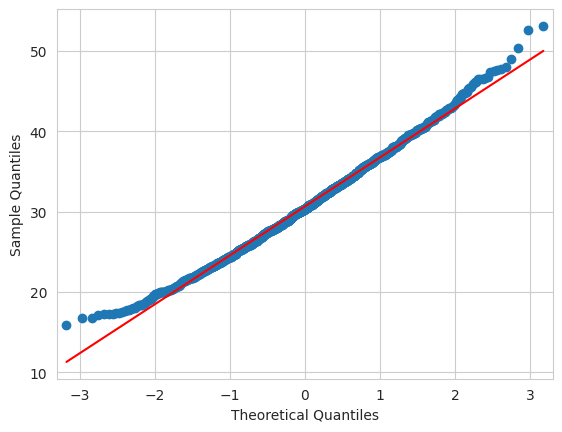

In [193]:
qqplot(data['bmi'], line='s')
plt.show()

Если удалить выбросы, то вполне вероятно, что распределение будет нормальным - большая часть точек уже ложится на прямую

Проверка нормальности распределения выборочных средних с помощью теста Колмогорова-Смирнова

In [118]:
def KS_test (names, datas):
  """
  Служебная функция для вывода информации o нормальности распределений
  по тесту Колмогорова-Смирнова c уровнем значимости 0.05.
  на входе - список выборок
  """
  seed(1)
  for data in datas:
      test_sk =  sts.kstest(data, 'norm')
      stat,p = float(test_sk.statistic), float(test_sk.pvalue)
      print(names[datas.index(data)])
      print('Statistics=%.3f, p=%.3f' % (stat, p))
      alpha = 0.05
      if p > alpha:
          print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
      else:
          print('Отвергаем H0 о нормальности распределения')
      print()

In [194]:
KS_test(['bmi'],[data['bmi']])

bmi
Statistics=1.000, p=0.000
Отвергаем H0 о нормальности распределения



In [195]:
# проверка нормальности распределения charges с помощью normaltest (критерия Д’Агостино) из библиотеки scipy.stats
stat, p_value = normaltest(data['bmi'])
print('Статистика теста на нормальность: {:.3f}, p-значение: {:.3f}'.format(stat, p_value))

if p_value > 0.05:
    print('Распределение признака нормально (не отвергаем H0)')
else:
    print('Распределение признака не нормально (отвергаем H0)')

Статистика теста на нормальность: 17.581, p-значение: 0.000
Распределение признака не нормально (отвергаем H0)


*Расходы charges*

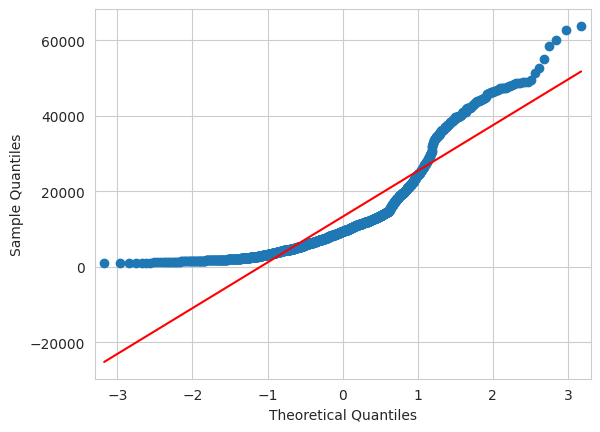

In [196]:
qqplot(data['charges'], line='s')
plt.show()

In [197]:
KS_test(['charges'],[data['charges']])

charges
Statistics=1.000, p=0.000
Отвергаем H0 о нормальности распределения



In [198]:
# проверка нормальности распределения charges с помощью normaltest (критерия Д’Агостино) из библиотеки scipy.stats
stat, p_value = normaltest(data['charges'])
print('Статистика теста на нормальность: {:.3f}, p-значение: {:.3f}'.format(stat, p_value))

if p_value > 0.05:
    print('Распределение признака нормально (не отвергаем H0)')
else:
    print('Распределение признака не нормально (отвергаем H0)')

Статистика теста на нормальность: 336.885, p-значение: 0.000
Распределение признака не нормально (отвергаем H0)


## Вывод
Построение графиков qq-plot и выполнение статистических тестов ( Колмогорова-СЧмирнова и д'Агостино) позволило отвергнуть нулевую гипотезу как в отношении bmi, так и для charges

## Задание 9
Загрузить данные из файла “ECDCCases.csv”.

In [202]:
df = pd.read_csv("/ECDCCases.csv")
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


## Задание 10
Проверить в данных наличие пропущенных значений.
Вывести количество пропущенных значений в процентах.
Удалить два признака, в которых больше всех пропущенных значений.
Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»),
для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.

In [204]:
# Проверить в данных наличие пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61904 non-null  object 
 1   day                                                         61904 non-null  int64  
 2   month                                                       61904 non-null  int64  
 3   year                                                        61904 non-null  int64  
 4   cases                                                       61904 non-null  int64  
 5   deaths                                                      61904 non-null  int64  
 6   countriesAndTerritories                                     61904 non-null  object 
 7   geoId                                                       61629 non-null  object 
 

Метод info() дает информацию о наличии пропусков в категориальных признаках geoId, countryterritoryCode  и числовых  popData2019, Cumulative_number_for_14_days_of_COVID-19_cases_per_100000                                                      

In [206]:
# Вывести количество пропущенных значений в процентах.
display(pd.DataFrame(df.isna().mean() * 100).round(2))

,0
dateRep,0.00
day,0.00
month,0.00
year,0.00
cases,0.00
deaths,0.00
countriesAndTerritories,0.00
geoId,0.44
countryterritoryCode,0.20
popData2019,0.20


In [207]:
# Удалить два признака, в которых больше всех пропущенных значений
# Больше всего пропусков в 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' и в 'geoId'
df = df.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' , 'geoId'], axis=1)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia


In [210]:
# обработать пропуски: для категориального признака countryterritoryCode использовать заполнение значением по умолчанию (например, «other»)
df['countryterritoryCode'].fillna('other')


,countryterritoryCode
0,AFG
1,AFG
2,AFG
3,AFG
4,AFG
...,...
61899,ZWE
61900,ZWE
61901,ZWE
61902,ZWE


In [211]:
#  для числового признака использовать заполнение медианным значением
df['popData2019'].fillna(df['popData2019'].median())

,popData2019
0,38041757.0
1,38041757.0
2,38041757.0
3,38041757.0
4,38041757.0
...,...
61899,14645473.0
61900,14645473.0
61901,14645473.0
61902,14645473.0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61904 non-null  object 
 1   day                      61904 non-null  int64  
 2   month                    61904 non-null  int64  
 3   year                     61904 non-null  int64  
 4   cases                    61904 non-null  int64  
 5   deaths                   61904 non-null  int64  
 6   countriesAndTerritories  61904 non-null  object 
 7   countryterritoryCode     61904 non-null  object 
 8   popData2019              61904 non-null  float64
 9   continentExp             61904 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 4.7+ MB


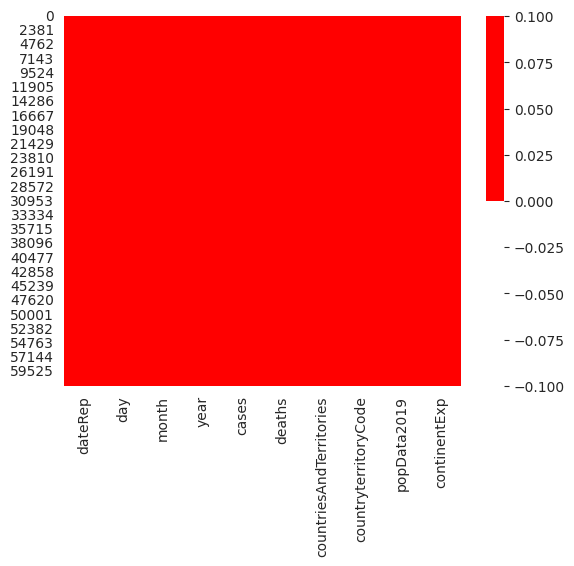

In [214]:
#Показать, что пропусков больше в данных нет.
colors=['white', 'red']
sns.heatmap(df.isna(), cmap=sns.color_palette(colors))
plt.show()

## Задание 11
Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [215]:
# Посмотреть статистику по данным, используя describe()
df.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [ ]:
# Сделать выводы о том, какие признаки содержат выбросы
# для числовых признаков можно построить box_plot

In [216]:
# Числовые признаки
names_digit = df.select_dtypes(exclude='object').columns.to_list()
names_digit

['day', 'month', 'year', 'cases', 'deaths', 'popData2019']

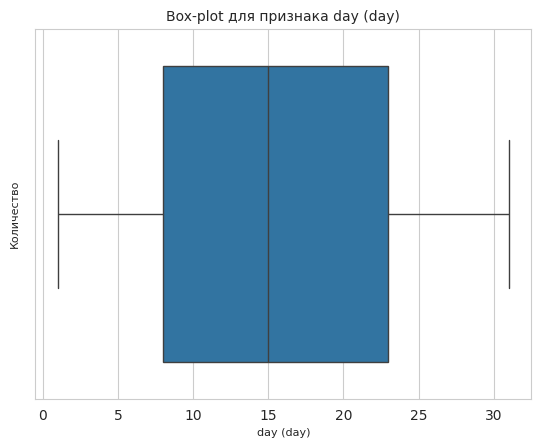

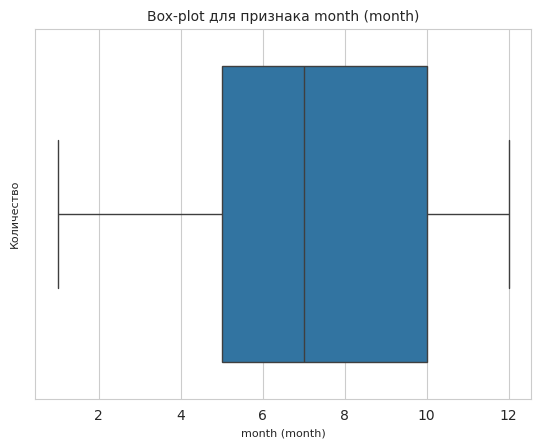

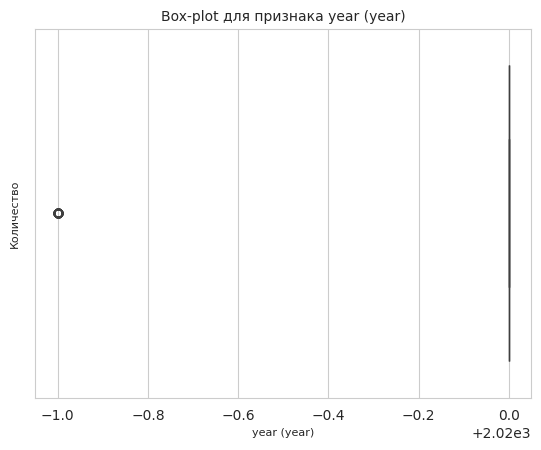

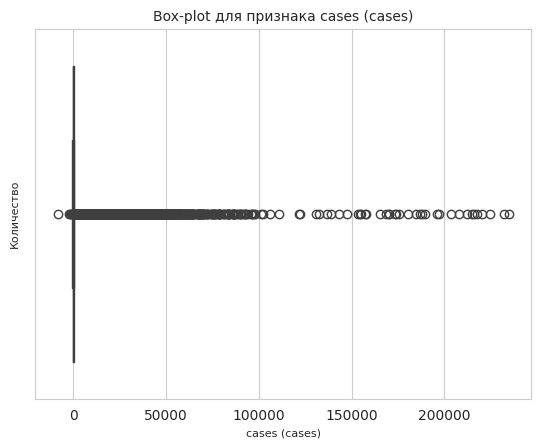

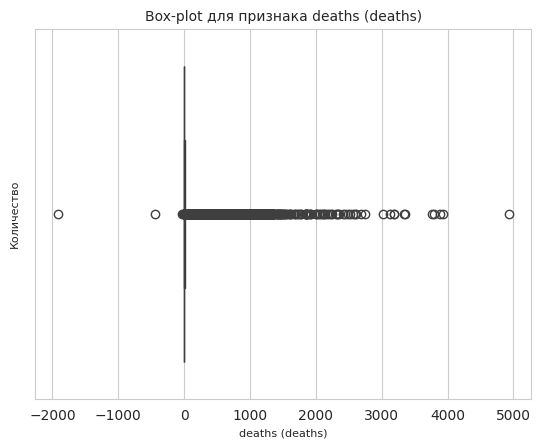

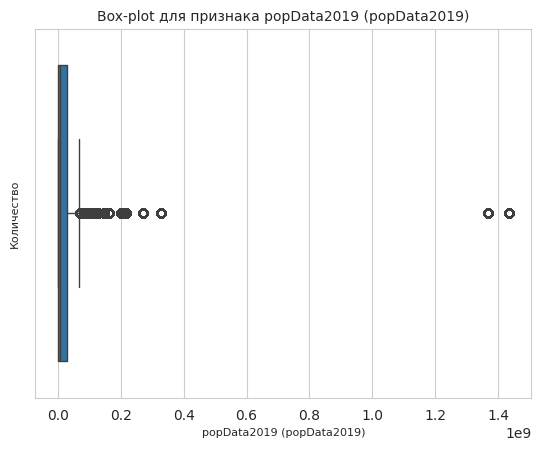

In [220]:
get_boxplot(df, xlbl=names_digit, columns=names_digit)

In [ ]:
# для категориальных признаков можно построить гистограмму

In [221]:
# категориальные признаки
names_cat = df.select_dtypes(include='object').columns.to_list()
names_cat

['dateRep', 'countriesAndTerritories', 'countryterritoryCode', 'continentExp']

In [226]:
# для каждого из категориальных  признаков определяем количество уникальных значений.
# это понадобится для задания параметра binwidth при построении гистограмм
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in names_cat],
                                          columns=['Наименование признака', 'Кол-во уникальных значений']).sort_values(by=['Кол-во уникальных значений'])
unique_counts

,Наименование признака,Кол-во уникальных значений
3,continentExp,6
2,countryterritoryCode,213
1,countriesAndTerritories,214
0,dateRep,350


In [230]:
df.continentExp.unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [231]:
df.countryterritoryCode.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'other', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD',
       'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'VAT', 'HND',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'XKX', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU',
       'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT',
       'MUS', 'MEX

In [233]:
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [235]:
df.dateRep.unique()

array(['14/12/2020', '13/12/2020', '12/12/2020', '11/12/2020',
       '10/12/2020', '09/12/2020', '08/12/2020', '07/12/2020',
       '06/12/2020', '05/12/2020', '04/12/2020', '03/12/2020',
       '02/12/2020', '01/12/2020', '30/11/2020', '29/11/2020',
       '28/11/2020', '27/11/2020', '26/11/2020', '25/11/2020',
       '24/11/2020', '23/11/2020', '22/11/2020', '21/11/2020',
       '20/11/2020', '19/11/2020', '18/11/2020', '17/11/2020',
       '16/11/2020', '15/11/2020', '14/11/2020', '13/11/2020',
       '12/11/2020', '11/11/2020', '10/11/2020', '09/11/2020',
       '08/11/2020', '07/11/2020', '06/11/2020', '05/11/2020',
       '04/11/2020', '03/11/2020', '02/11/2020', '01/11/2020',
       '31/10/2020', '30/10/2020', '29/10/2020', '28/10/2020',
       '27/10/2020', '26/10/2020', '25/10/2020', '24/10/2020',
       '23/10/2020', '22/10/2020', '21/10/2020', '20/10/2020',
       '19/10/2020', '18/10/2020', '17/10/2020', '16/10/2020',
       '15/10/2020', '14/10/2020', '13/10/2020', '12/10

выбросы есть в числовых признаках year,cases, deaths и popData2019. В категориальных признаках выбросов нет

In [236]:
#Посмотреть, для каких стран количество смертей в день превысило 3000
df[df['deaths']>3000]['countriesAndTerritories'].unique()

array(['Argentina', 'Ecuador', 'Mexico', 'Peru',
       'United_States_of_America'], dtype=object)

In [237]:
#и сколько таких дней было
len(df[df['deaths']>3000])

11

## Задание 12
Найти дублирование данных. Удалить дубликаты.

In [246]:
df.duplicated().any() # проверяем, есть ли дубликаты

np.True_

In [248]:
# теперь ищем непосредственно записи-дубликаты
duplicate = df[df.duplicated(keep=False)]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
217,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
218,12/05/2020,12,5,2020,285,2,Afghanistan,AFG,38041757.0,Asia
48009,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48010,29/05/2020,29,5,2020,0,0,Saint_Lucia,LCA,182795.0,America
48072,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America
48073,28/03/2020,28,3,2020,0,0,Saint_Lucia,LCA,182795.0,America


In [249]:
# и удаляем
df_cleaned = df.drop_duplicates(keep="first")
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61900 entries, 0 to 61903
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61900 non-null  object 
 1   day                      61900 non-null  int64  
 2   month                    61900 non-null  int64  
 3   year                     61900 non-null  int64  
 4   cases                    61900 non-null  int64  
 5   deaths                   61900 non-null  int64  
 6   countriesAndTerritories  61900 non-null  object 
 7   countryterritoryCode     61900 non-null  object 
 8   popData2019              61900 non-null  float64
 9   continentExp             61900 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 5.2+ MB


## Задание 13
Загрузить данные из файла “bmi.csv”.
Взять оттуда две выборки.
Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest.
Сравнить средние значения этих выборок, используя t-критерий Стьюдента.
Предварительно проверить выборки на нормальность (критерий ШопироУилка) и на гомогенность дисперсии (критерий Бартлетта).

In [251]:
#Загрузить данные из файла “bmi.csv”
df = pd.read_csv("/bmi.csv")
df

,bmi,region
0,27.900,southwest
1,33.770,southeast
2,33.000,southeast
3,22.705,northwest
4,28.880,northwest
...,...,...
1333,30.970,northwest
1334,31.920,northeast
1335,36.850,southeast
1336,25.800,southwest


In [256]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [252]:
#Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest.
df_n = df[df['region']=='northwest']
df_s = df[df['region']=='southwest']

In [255]:
len(df_n), len(df_s)

(325, 325)

In [ ]:
# Предварительно проверить выборки на нормальность (критерий ШопироУилка) .

In [143]:
def shapiro_test(data):
    """
    Служебная функция для вывода информации по тесту Шапиро-Уилкса для небольших выборок
    """
    seed(1)
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
    else:
        print('Отвергаем H0 о нормальности распределения')


In [253]:
shapiro_test(df_n['bmi'])

Statistics=0.995, p=0.466
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)


In [254]:
shapiro_test(df_s['bmi'])

Statistics=0.995, p=0.363
Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)


In [ ]:
# Предварительно проверить выборки на  гомогенность дисперсии (критерий Бартлетта).

Проверка гомогенности дисперсии. Критерий Бартлетта – статистический критерий, позволяющий проверять равенство дисперсий нескольких (двух и более) выборок. Нулевая гипотеза предполагает, что рассматриваемые выборки получены из генеральных совокупностей, обладающих одинаковыми дисперсиями. Так же предполагается, что выборки распределены нормально

In [265]:
stat, pvalue = sts.bartlett(df_n['bmi'], df_s['bmi'])
# print(float(statistic), float(pvalue))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))
alpha = 0.05
if pvalue > alpha:
    print('p-уровень превышает 0.05, следовательно, дисперсии выборок примерно одинаковы. Можем переходить к критерию Стьюдента')
else:
    print('Отвергаем H0 о принадлежности выборок к генеральным совокупностям с одинаковыми дисперсиями')


Statistics=3.400, p=0.065
p-уровень превышает 0.05, следовательно, дисперсии выборок примерно одинаковы. Можем переходить к критерию Стьюдента


In [266]:
#Сравнить средние значения этих выборок, используя t-критерий Стьюдента.
stat, p = sts.ttest_ind(df_n['bmi'], df_s['bmi'], equal_var = True)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-3.28442, p=0.00108
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [267]:
df_reg =\
    pd.DataFrame({
        'northwest': df_n['bmi'].to_list(),
        'southwest': df_s['bmi'].to_list()
    })

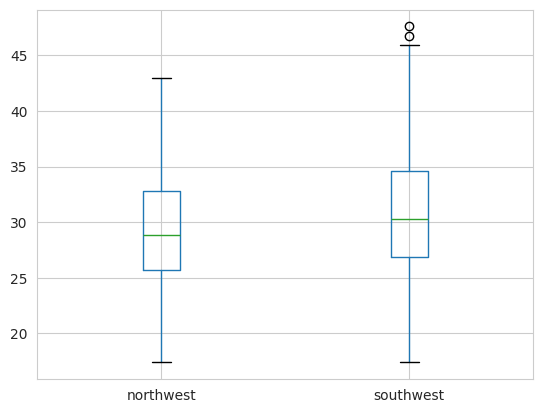

In [268]:
df_reg.boxplot()
plt.show()

ТО, что средние различаются, видно и на боксплотах для northwest и southwest

## Задание 14
Кубик бросили 600 раз, получили следующие результаты:
|N|Количество выпадений|
|-|-|
|1|97|
|2|98|
|3|109|
|4|95|
|5|97|
|6|104|

С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().


In [275]:
data = pd.DataFrame({'points': [1,2,3,4,5,6],
 'observed': [97,98,109,95,97,104],
 'expected': [100,100,100,100,100,100]})


In [276]:
data

,points,observed,expected
0,1,97,100
1,2,98,100
2,3,109,100
3,4,95,100
4,5,97,100
5,6,104,100


In [277]:
stat, pvalue = sts.chisquare(data['observed'], data['expected'])[:2]
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу о равномерности распределения')
else:
    print('Отклоняем нулевую гипотезу')

Statistics=1.440, p=0.920
Не отклоняем нулевую гипотезу о равномерности распределения


## Задание 15
С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми. Создать датафрейм, используя следующий код:

```python
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не
работает','На домохозяйстве','На пенсии','Учёба']
```

Использовать функцию scipy.stats.chi2_contingency(). Влияет ли семейное положение на занятость?

In [269]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

In [270]:
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [274]:
# С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми
# H0: категориальные переменные A - занятость и B - семейное положение независимы;
# H1: категориальные переменные A и B связаны между собой.
stat, pvalue = sts.chi2_contingency(data)[:2]
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу о независимости занятости и семейного положения')
else:
    print('Отклоняем нулевую гипотезу, семейное положение и занятость, вероятно, связаны')

Statistics=122.297, p=0.000
Отклоняем нулевую гипотезу, семейное положение и занятость, вероятно, связаны
